<a href="https://colab.research.google.com/github/Francisroyce/Francisroyce/blob/main/end_to_end_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
!pip install --upgrade pip
!pip install --upgrade setuptools


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
!pip install tensorflow opencv-python matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [123]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
cac

In [124]:
import tensorflow as tf
import os

In [125]:
# avoid OOM (out of memory error)errors by setting GPU memory consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [126]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

1

In [127]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [128]:
data_dir = '/content/drive/MyDrive/data'

In [129]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

# Remove Dodgy images

In [130]:
os.listdir(os.path.join(data_dir, 'happy'))

['image15.jpeg',
 'image16.jpeg',
 'images.jpg',
 'young-and-happy-people-vector-15114154.jpg',
 'image19.jpeg',
 'image20.jpeg',
 'image31.jpeg',
 'image29.jpeg',
 'image22.jpeg',
 'what-makes-people-happy1.jpg',
 'images8.jpg',
 'happy-person.jpeg',
 'images9.jpg',
 'happyball-3.jpg',
 'Stunzy-Happy-People.jpg',
 'images16.jpg',
 'Travis-Bradberry-Happy.jpg',
 '170404-happy-workers-feature.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'png-transparent-happiness-love-happy-people-love-child-hand-thumbnail.png',
 'happy-people-jump-with-raised-arms-characters-win_107791-14884.jpg',
 '960x0.jpg',
 'riskshappypeopletakeh_1384254283.jpg',
 'images23.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'p074953m.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 'compassion-900x387.jpg',
 'images22.jpg',
 'png-clipart-happiness-graphy-smile-happy-people-love-photography.png',
 'png-transparent-graphy-happy-people-love-chil

In [131]:
os.listdir(os.path.join(data_dir, 'sad'))

['Sad2BPerson2BIn2BEveryday2BLife.jpg',
 '1000_F_124527256_XeXO1Q7xiE39ZcnuCOHTCotlj7p1FYwc.jpg',
 '360_F_193820020_Ahs6w4lcZGHeU53uDaJXe6Jm9Lu8LA9L.jpg',
 '360_F_573380015_l5YdjSZuJqET7UWOHBVMhzT7J63O8hPq.jpg',
 '7RNXwSxCAKL8vGtXG2ZkyD-1200-80.jpg',
 'man-tears-tear-look.jpg',
 'Science_robotgait_124649246.jpg',
 'sad-wise-woman-at-window.jpg',
 'image-20160914-4963-19knfh1.jpg',
 'rtor_guest-blog_fetured-image_Depression-versus-Sadness-How-to-Recognize-and-Cope.jpg',
 'sad-people-icon-2CCHXB2.jpg',
 'Sad-man-sitting-in-bedroom-header.jpg',
 'sadness-inside-out-today-main-tease-191018.jpg',
 'png-transparent-woman-sad-folklore-ghost-horror-spirit-vendetta-vengeance-girl-person-thumbnail.png',
 'sad-person-concept-vector-26538685.jpg',
 'sadness.jpg',
 'Depression-Vs-Sadness-Are-You-Just-Sad-Or-Depressed-2020-960x640.jpg',
 'Fotolia_86046414_XS_0.jpg',
 'Make-someone-sad-happy.jpg',
 'sad-looking-man.jpg',
 '5acf9ed1146e711e008b46d7.jpg',
 'sad-people-vector-26812552.jpg',
 'b11b520b08

In [132]:
for image_class in os.listdir(data_dir):
   for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)


Sad2BPerson2BIn2BEveryday2BLife.jpg
1000_F_124527256_XeXO1Q7xiE39ZcnuCOHTCotlj7p1FYwc.jpg
360_F_193820020_Ahs6w4lcZGHeU53uDaJXe6Jm9Lu8LA9L.jpg
360_F_573380015_l5YdjSZuJqET7UWOHBVMhzT7J63O8hPq.jpg
7RNXwSxCAKL8vGtXG2ZkyD-1200-80.jpg
man-tears-tear-look.jpg
Science_robotgait_124649246.jpg
sad-wise-woman-at-window.jpg
image-20160914-4963-19knfh1.jpg
rtor_guest-blog_fetured-image_Depression-versus-Sadness-How-to-Recognize-and-Cope.jpg
sad-people-icon-2CCHXB2.jpg
Sad-man-sitting-in-bedroom-header.jpg
sadness-inside-out-today-main-tease-191018.jpg
png-transparent-woman-sad-folklore-ghost-horror-spirit-vendetta-vengeance-girl-person-thumbnail.png
sad-person-concept-vector-26538685.jpg
sadness.jpg
Depression-Vs-Sadness-Are-You-Just-Sad-Or-Depressed-2020-960x640.jpg
Fotolia_86046414_XS_0.jpg
Make-someone-sad-happy.jpg
sad-looking-man.jpg
5acf9ed1146e711e008b46d7.jpg
sad-people-vector-26812552.jpg
b11b520b0818895ae5563d1e70294052.jpg
iend-people-asian-beauty-sad-girl-was-comforted-girl-friend-peo

In [133]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/data/happy/05-12-21-happy-people.jpg'))

In [134]:
img.shape

(880, 1400, 3)

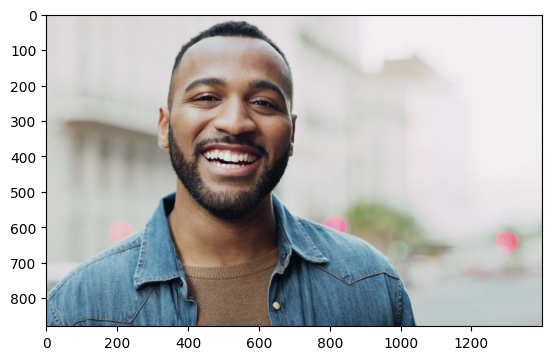

In [135]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [136]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


Issue with image /content/drive/MyDrive/data/logs/train
Issue with image /content/drive/MyDrive/data/logs/validation


In [137]:
len('/content/drive/MyDrive/data/happy')

33

In [138]:
len('/content/drive/MyDrive/data/sad')

31

# Load Data

In [139]:
tf.data.Dataset??

In [140]:
import tensorflow as tf

dataset = tf.keras.utils.image_dataset_from_directory??


In [141]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')


Found 103 files belonging to 4 classes.


In [142]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [143]:
data_iterator = data.as_numpy_iterator()

In [144]:
data_iterator

In [145]:
# get another batch from the iterator
batch = data_iterator.next()

In [146]:
batch

(array([[[[  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          ...,
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ]],
 
         [[  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          ...,
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ]],
 
         [[  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          ...,
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ]],
 
         ...,
 
         [[  0.      ,   0.      ,   0.      ],
          [  0.   

In [147]:
len(batch)

2

In [148]:
batch[0]

array([[[[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],

        [[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],

        [[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],

        ...,

        [[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]

In [149]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [150]:
# labels
batch[1]

array([3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1,
       3, 1, 3, 3, 1, 1, 3, 1, 3, 1], dtype=int32)

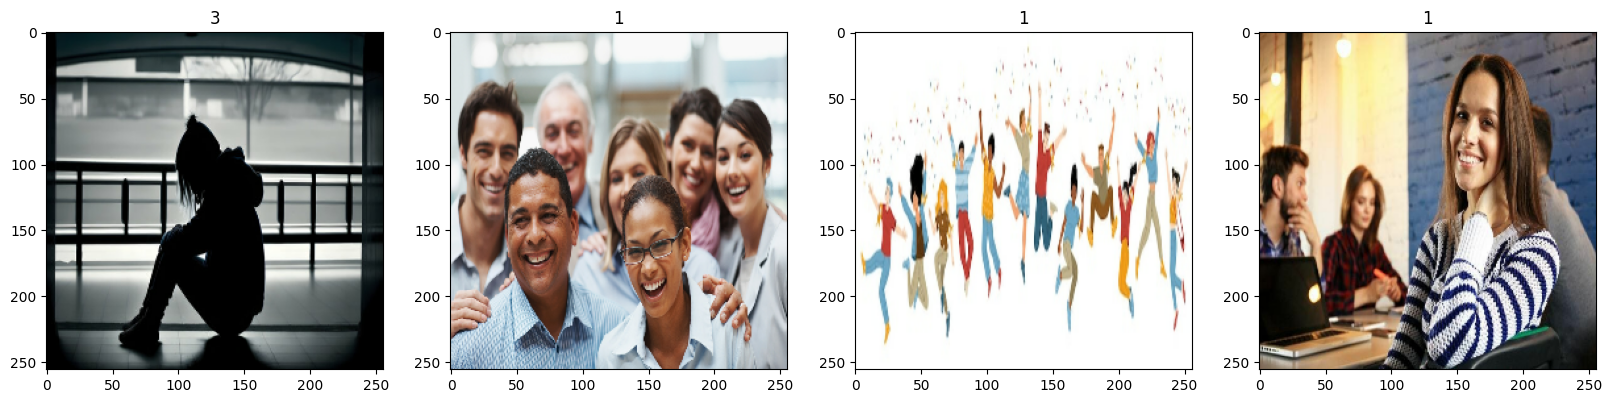

In [151]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].set_title(batch[1][idx])
# from here, you can see class 1 = sad and class 0 = happy

# PreProcessig data

In [152]:
batch[0].min(), batch[0].max(), batch[0].shape, batch[1].shape

(0.0, 255.0, (32, 256, 256, 3), (32,))

In [153]:
# scalig with max umber
scaled = batch[0] / 255

In [154]:
scaled.min(), scaled.max()

(0.0, 1.0)

In [155]:
# scale data
data = data.map(lambda x, y: (x/255, y))

In [156]:
data.as_numpy_iterator().next()

(array([[[[4.44316775e-01, 5.14905035e-01, 5.30591309e-01],
          [4.49739575e-01, 5.20327806e-01, 5.36014080e-01],
          [4.64598656e-01, 5.15579045e-01, 5.39108455e-01],
          ...,
          [4.77604181e-01, 5.32506108e-01, 5.36427677e-01],
          [4.76746321e-01, 5.27726710e-01, 5.51256120e-01],
          [4.77190554e-01, 5.28170943e-01, 5.51700354e-01]],
 
         [[4.49388683e-01, 5.19976914e-01, 5.35663188e-01],
          [4.47058827e-01, 5.17647088e-01, 5.33333361e-01],
          [4.50980395e-01, 5.09803951e-01, 5.29411793e-01],
          ...,
          [4.74708945e-01, 5.30851722e-01, 5.42616427e-01],
          [4.72954005e-01, 5.23934424e-01, 5.47463834e-01],
          [4.72028196e-01, 5.23008585e-01, 5.46537995e-01]],
 
         [[4.49126840e-01, 5.19715071e-01, 5.35401344e-01],
          [4.47058827e-01, 5.17647088e-01, 5.33333361e-01],
          [4.43137258e-01, 5.13725519e-01, 5.29411793e-01],
          ...,
          [4.64663267e-01, 5.23486793e-01, 5.4309

In [157]:
data.as_numpy_iterator().next()[0].max()

1.0

In [158]:
data.as_numpy_iterator().next()[0].min()

0.0

In [159]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [160]:
batch[0].min(), batch[0].max()

(0.0, 1.0)

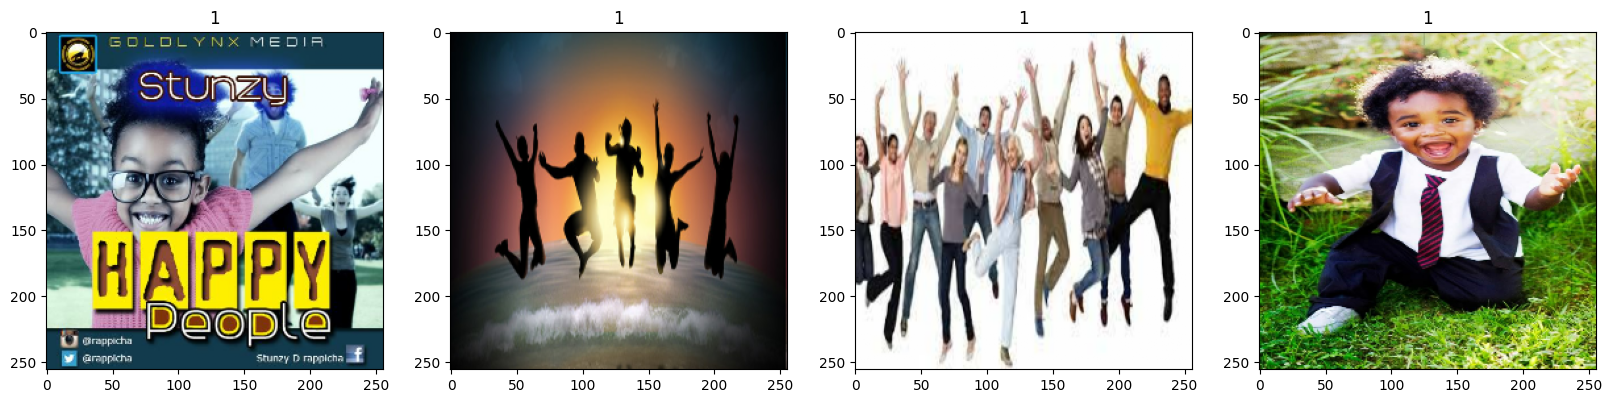

In [161]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].set_title(batch[1][idx])
# from here, you can see class 1 = sad and class 0 = happy

# split data

In [162]:
len(data)

4

In [163]:
train_size = int(len(data)*.7) 
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [164]:
train_size, val_size, test_size

(2, 1, 1)

In [165]:
train_size + val_size + test_size

4

In [166]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Deep model

build deep learning model

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [168]:
model = Sequential()

In [169]:
# convolutional neural network (CNN) model architecture 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# First Convolutional Layer
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [170]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [171]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 123008)            0         
                                                                 
 dense_2 (Dense)             (None, 256)              

# Train

In [172]:
logdir = '/content/drive/MyDrive/data/logs'

In [173]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [174]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 10s 5s/step - loss: -16.8515 - accuracy: 0.6094 - val_loss: -39.9832 - val_accuracy: 0.8438
Epoch 2/20
2/2 [==============================] - 5s 3s/step - loss: -124.0145 - accuracy: 0.6875 - val_loss: -210.0000 - val_accuracy: 0.7500
Epoch 3/20
2/2 [==============================] - 3s 1s/step - loss: -221.4728 - accuracy: 0.7344 - val_loss: -195.6418 - val_accuracy: 0.8125
Epoch 4/20
2/2 [==============================] - 3s 1s/step - loss: -389.0606 - accuracy: 0.7656 - val_loss: -814.8556 - val_accuracy: 0.5938
Epoch 5/20
2/2 [==============================] - 3s 1s/step - loss: -610.7342 - accuracy: 0.7812 - val_loss: -657.3510 - val_accuracy: 0.7812
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: -823.5162 - accuracy: 0.7812 - val_loss: -579.9448 - val_accuracy: 0.8438
Epoch 7/20
2/2 [==============================] - 3s 1s/step - loss: -1460.8228 - accuracy: 0.7500 - val_loss: -1890.4325 - val_accuracy: 0.750

In [175]:
hist

In [176]:
hist.history

{'loss': [-16.85147476196289,
  -124.0145492553711,
  -221.47283935546875,
  -389.0605773925781,
  -610.7341918945312,
  -823.5161743164062,
  -1460.82275390625,
  -1837.8963623046875,
  -3205.37744140625,
  -3515.99658203125,
  -5089.982421875,
  -9048.6220703125,
  -9672.2763671875,
  -11163.0478515625,
  -18211.0625,
  -19772.900390625,
  -25468.3203125,
  -49183.75390625,
  -32891.85546875,
  -62668.0078125],
 'accuracy': [0.609375,
  0.6875,
  0.734375,
  0.765625,
  0.78125,
  0.78125,
  0.75,
  0.78125,
  0.71875,
  0.765625,
  0.734375,
  0.671875,
  0.734375,
  0.78125,
  0.75,
  0.765625,
  0.765625,
  0.703125,
  0.8125,
  0.765625],
 'val_loss': [-39.983177185058594,
  -210.00003051757812,
  -195.64175415039062,
  -814.8555908203125,
  -657.3510131835938,
  -579.94482421875,
  -1890.4324951171875,
  -3848.34912109375,
  -2964.546875,
  -6301.59765625,
  -8891.6689453125,
  -8960.287109375,
  -10534.234375,
  -25208.4921875,
  -15414.1640625,
  -26831.478515625,
  -43252.632

# plot performance

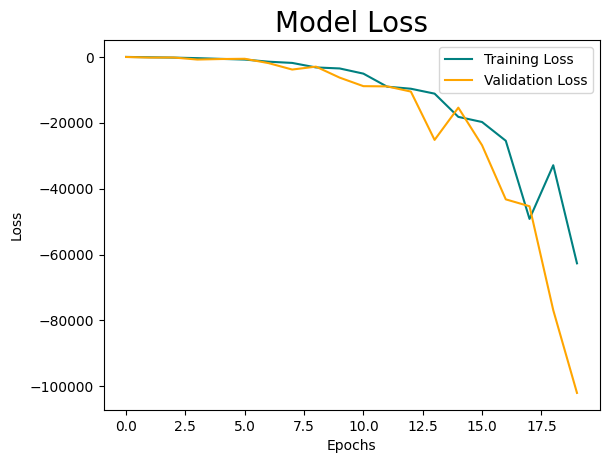

In [177]:
# fig = plt.figure()
# plt.plot(hist.history['loss'], color='teal', label = 'loss')
# plt.plot(hist.history['val_loss'], color='orange', label = 'val_loss')
# fig.suptitle('Loss', fontsize = 20)
# plt.legend(loc = 'upper left')
# plt.show()

fig, ax = plt.subplots()
ax.plot(hist.history['loss'], color='teal', label='Training Loss')
ax.plot(hist.history['val_loss'], color='orange', label='Validation Loss')
ax.set_title('Model Loss', fontsize=20)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend(loc='upper right')
plt.show()

# it is overfittig cos val_loss is goig u


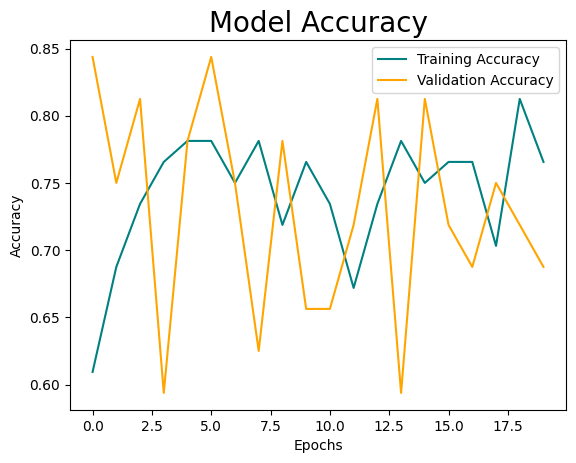

In [178]:
fig, ax = plt.subplots()
ax.plot(hist.history['accuracy'], color='teal', label='Training Accuracy')
ax.plot(hist.history['val_accuracy'], color='orange', label='Validation Accuracy')
ax.set_title('Model Accuracy', fontsize=20)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend(loc='upper right')
plt.show()


# Evaluate 

In [179]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy